In [5]:
from google.colab import files
uploaded = files.upload()

Saving calories_consumed.csv to calories_consumed.csv


In [6]:
import pandas as pd
import io


In [7]:
import numpy as np
import matplotlib.pyplot as plt



In [8]:
calories_consumed = pd.read_csv(io.BytesIO(uploaded['calories_consumed.csv']))
print(calories_consumed)

    Weight gained (grams)  Calories Consumed
0                     108               1500
1                     200               2300
2                     900               3400
3                     200               2200
4                     300               2500
5                     110               1600
6                     128               1400
7                      62               1900
8                     600               2800
9                    1100               3900
10                    100               1670
11                    150               1900
12                    350               2700
13                    700               3000


In [9]:
calories_consumed=calories_consumed.rename(columns={'Weight gained (grams)': "Weight", 'Calories Consumed' : "Calories"})
calories_consumed

,Weight,Calories
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <a list of 10 Patch objects>)

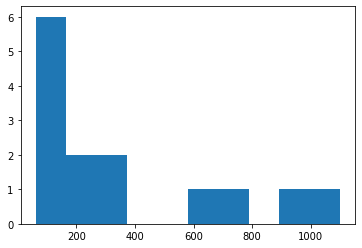

In [10]:
plt.hist(calories_consumed.Weight)

{'boxes': [<matplotlib.lines.Line2D at 0x7f4192f98f50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4192fa9050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4192fb1090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4192fa9b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4192fa0590>,
  <matplotlib.lines.Line2D at 0x7f4192fa0ad0>]}

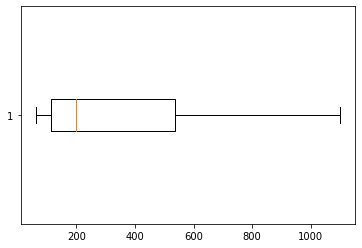

In [11]:
plt.boxplot(calories_consumed.Weight,0,"rs",0)

Text(0, 0.5, 'Weight')

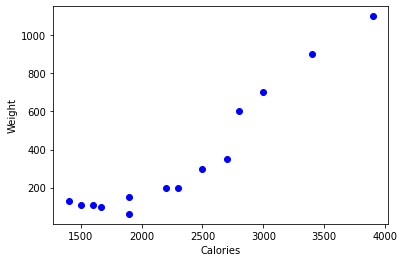

In [12]:
plt.plot(calories_consumed.Calories, calories_consumed.Weight,"bo");plt.xlabel("Calories");plt.ylabel("Weight")

In [13]:
#to find correlation
calories_consumed.Weight.corr(calories_consumed.Calories)

0.9469910088554458

In [14]:
np.corrcoef(calories_consumed.Weight,calories_consumed.Calories)

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [15]:
import statsmodels.formula.api as smf
model=smf.ols("Weight~Calories",data=calories_consumed).fit()
model.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept   -625.752356
Calories       0.420157
dtype: float64

In [16]:
model.summary()
model.conf_int(0.05)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


,0,1
Intercept,-845.426655,-406.078057
Calories,0.330506,0.509807


In [17]:
pred=model.predict(calories_consumed)
pred

0        4.482599
1      340.607908
2      802.780209
3      298.592245
4      424.639236
5       46.498263
6      -37.533065
7      172.545254
8      550.686227
9     1012.858527
10      75.909227
11     172.545254
12     508.670563
13     634.717554
dtype: float64

Text(0, 0.5, 'Weight')

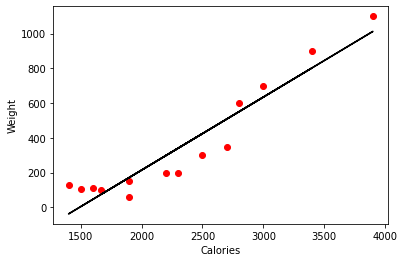

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x=calories_consumed['Calories'],y=calories_consumed['Weight'],color='red');plt.plot(calories_consumed['Calories'],pred,color='black');plt.xlabel("Calories");plt.ylabel("Weight")

In [20]:
pred.corr(calories_consumed.Weight)


0.9469910088554457

In [22]:
#Transforming variables for accuracy
model1=smf.ols("Weight~np.log(Calories)", data=calories_consumed).fit()
model1
model.params
model1.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     50.40
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.25e-05
Time:                        02:35:05   Log-Likelihood:                -89.148
No. Observations:                  14   AIC:                             182.3
Df Residuals:                      12   BIC:                             183.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6955.6501   1030.908     -6.747      0.000   -9201.806   -4709.494
np.log(Calories)   948.3717    133.580      7.100      0.000     657.325    1239.418
==============================================================================
Omnibus:                        3.265   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                1.139
Skew:                           0.046   Prob(JB):                        0.566
Kurtosis:                       1.606   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
pred1=model1.predict(calories_consumed)
pred1

0     -19.998702
1     385.377115
2     756.063670
3     343.220320
4     464.453875
5      41.207806
6     -85.429591
7     204.185731
8     571.931596
9     886.181334
10     81.817081
11    204.185731
12    537.441550
13    637.362484
dtype: float64

Text(0, 0.5, 'Weight')

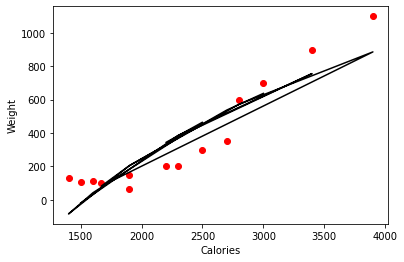

In [24]:
#Data Vizualization
import matplotlib.pyplot as plt
plt.scatter(x=calories_consumed['Calories'],y=calories_consumed['Weight'],color='red');plt.plot(calories_consumed['Calories'],pred1,color='black');plt.xlabel("Calories");plt.ylabel("Weight")

In [25]:
#Exponential Transformation
model2=smf.ols("np.log(Weight)~Calories",data=calories_consumed).fit()
model2.summary()
pred2=model2.predict(calories_consumed)
pred2

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


0     4.539069
1     5.445947
2     6.692904
3     5.332587
4     5.672666
5     4.652428
6     4.425709
7     4.992508
8     6.012745
9     7.259702
10    4.731780
11    4.992508
12    5.899386
13    6.239465
dtype: float64

Text(0, 0.5, 'Weight')

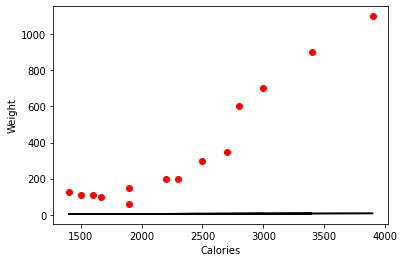

In [26]:
#Data Vizualization
import matplotlib.pyplot as plt
plt.scatter(x=calories_consumed["Calories"],y=calories_consumed["Weight"],color='red');plt.plot(calories_consumed["Calories"],pred2,color='black');plt.xlabel("Calories");plt.ylabel("Weight")

In [27]:
#Quadratic Transformation
calories_consumed["Calories_Sq"]=calories_consumed.Calories*calories_consumed.Calories
model3=smf.ols('Weight~Calories_Sq',data=calories_consumed).fit()
model3.summary()
pred3=model3.predict(calories_consumed)
pred3

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


0       44.139287
1      298.059212
2      821.769058
3      260.472381
4      378.244451
5       70.032437
6       19.916662
7      157.735043
8      511.051255
9     1126.640021
10      89.151605
11     157.735043
12     465.111794
13     607.941752
dtype: float64

Text(0, 0.5, 'Weight')

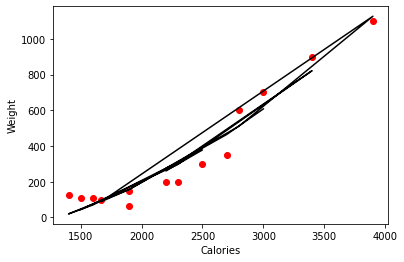

In [28]:
#Data Vizualization
import matplotlib.pyplot as plt
plt.scatter(x=calories_consumed["Calories"],y=calories_consumed["Weight"],color='red');plt.plot(calories_consumed["Calories"],pred3,color='black');plt.xlabel("Calories");plt.ylabel("Weight")